# Project 3: Building a Model to Predict Gender Based on Socioeconomic and Occupational Features
This project explores the relationship between gender and various socioeconomic factors, leveraging the Gender Pay Gap dataset from Kaggle. The dataset contains information on income, occupation, hours worked per week, education level, and other factors. The goal is to predict gender using these features and analyze patterns that highlight societal and occupational trends.

* Step 1: Data Processing and Model Fitting
Using the Gender Pay Gap dataset, we will preprocess the data and fit a classification model (e.g., logistic regression, decision trees, or random forests) to predict gender based on features such as income, occupation, hours worked per week, and education. The aim is to identify the variables most strongly associated with gender classification.

* Step 2: Model Evaluation Metrics
Model performance will be evaluated using metrics such as accuracy, precision, recall, F1-score, and area under the ROC curve (AUC-ROC). These metrics will ensure a comprehensive assessment of the model's predictive ability and its robustness across different classes.

* Step 3: Model Interpretability
We will utilize interpretability tools such as SHAP and LIME to analyze feature importance at both global and local levels. This step will help us understand which variables (e.g., income, hours worked, or education level) have the most significant influence on gender predictions and explore any trends or patterns.

* Step 4: Fairness Analysis
Fairness will be assessed using tools like Microsoft Fairlearn to examine potential disparities in model performance for subgroups based on factors like income level, education, or occupation type. Strategies for mitigating any detected biases and ensuring equitable predictions will be considered.

* Step 5: Bias and Ethical Implications
The analysis will critically examine the ethical implications of using such a model, particularly with regard to potential biases in the dataset and the societal stereotypes it may reinforce. We will evaluate how these biases could impact real-world applications and address the ethical challenges of predictive modeling in this context.

## Step 1: Data Processing and Model Fitting

In [2]:
!pip install shap lime scikit-learn tensorflow evidently Fairlearn

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.pipeline import Pipeline
from sklearn.utils import Bunch
from sklearn.metrics import (
    balanced_accuracy_score,
    roc_auc_score,
    accuracy_score,
    recall_score,
    confusion_matrix,
    roc_auc_score,
    roc_curve,
    RocCurveDisplay)

import shap
import lime
import lime.lime_tabular
from lime.lime_tabular import LimeTabularExplainer

from fairlearn.metrics import (
    MetricFrame,
    true_positive_rate,
    false_positive_rate,
    false_negative_rate,
    selection_rate,
    count,
    false_negative_rate_difference
)

from fairlearn.postprocessing import ThresholdOptimizer, plot_threshold_optimizer
from fairlearn.postprocessing._interpolated_thresholder import InterpolatedThresholder
from fairlearn.postprocessing._threshold_operation import ThresholdOperation
from fairlearn.reductions import ExponentiatedGradient, EqualizedOdds, TruePositiveRateParity


import evidently

from evidently import ColumnMapping

from evidently.report import Report
from evidently.metrics.base_metric import generate_column_metrics
from evidently.metric_preset import DataDriftPreset, TargetDriftPreset, DataQualityPreset, RegressionPreset
from evidently.metrics import *



     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.2/107.2 kB 11.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.5/3.5 MB 34.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.3/13.3 MB 51.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 240.0/240.0 kB 19.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.1/231.1 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 555.5/555.5 kB 34.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 442.1/442.1 kB 40.5 MB/s eta 0:00:00


### Loading the Dataset

In [3]:
# Loading the Dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/CurrentPopulationSurvey.csv")

In [4]:
df.head()

,year,serial,numprec,hwtsupp,gq,region,statefip,metro,metarea,county,...,foodcare,building,sales,officeadmin,farmer,constructextractinstall,production,transport,sumadj_occ,LEHS
0,1990,9677,1,1052.650024,1,12,36,2.0,5607.0,NaN,...,0,0,0,1,0,0,0,0,1,1
1,2009,64923,4,971.200012,1,33,5,2.0,NaN,NaN,...,0,0,0,1,0,0,0,0,1,1
2,1990,8425,1,1622.280029,1,12,36,3.0,5607.0,NaN,...,0,0,0,0,0,0,0,0,1,1
3,1990,67963,1,2689.909912,1,42,6,3.0,7400.0,NaN,...,0,0,0,0,0,0,0,0,1,0
4,1981,38650,9,1911.900024,1,31,51,3.0,8840.0,NaN,...,0,0,0,0,0,0,0,0,1,1


### Cleaning the Dataset

In [5]:
# Selecting Particular Columns for the model
selected_columns = ['year', 'statefip', 'age', 'sex', 'race', 'marst', 'educ99', 'occ', 'ind', 'wkswork1', 'uhrswork', 'incwage']
df = df[selected_columns].copy()
df.head()

,year,statefip,age,sex,race,marst,educ99,occ,ind,wkswork1,uhrswork,incwage
0,1990,36,58,1,3,6,NaN,335,871,52,35,14200.0
1,2009,5,28,1,1,6,10.0,5120,8660,52,40,17680.0
2,1990,36,37,1,1,6,NaN,217,380,52,40,28000.0
3,1990,6,34,1,1,6,NaN,64,740,47,45,27500.0
4,1981,51,38,1,4,1,NaN,245,798,52,40,17000.0


In [6]:
# Grouping States according to area
statefip = {
    1: 'AL', 2: 'AK', 4: 'AZ', 5: 'AR', 6: 'CA', 8: 'CO', 9: 'CT', 10: 'DE', 11: 'DC',
    12: 'FL', 13: 'GA', 15: 'HI', 16: 'ID', 17: 'IL', 18: 'IN', 19: 'IA', 20: 'KS',
    21: 'KY', 22: 'LA', 23: 'ME', 24: 'MD', 25: 'MA', 26: 'MI', 27: 'MN', 28: 'MS',
    29: 'MO', 30: 'MT', 31: 'NE', 32: 'NV', 33: 'NH', 34: 'NJ', 35: 'NM', 36: 'NY',
    37: 'NC', 38: 'ND', 39: 'OH', 40: 'OK', 41: 'OR', 42: 'PA', 44: 'RI', 45: 'SC',
    46: 'SD', 47: 'TN', 48: 'TX', 49: 'UT', 50: 'VT', 51: 'VA', 53: 'WA', 54: 'WV',
    55: 'WI', 56: 'WY'
}

state_to_region = {
    'AL': 'South', 'AK': 'West', 'AZ': 'West', 'AR': 'South', 'CA': 'West',
    'CO': 'West', 'CT': 'Northeast', 'DE': 'South', 'FL': 'South', 'GA': 'South',
    'HI': 'West', 'ID': 'West', 'IL': 'Midwest', 'IN': 'Midwest', 'IA': 'Midwest',
    'KS': 'Midwest', 'KY': 'South', 'LA': 'South', 'ME': 'Northeast', 'MD': 'South',
    'MA': 'Northeast', 'MI': 'Midwest', 'MN': 'Midwest', 'MS': 'South', 'MO': 'Midwest',
    'MT': 'West', 'NE': 'Midwest', 'NV': 'West', 'NH': 'Northeast', 'NJ': 'Northeast',
    'NM': 'West', 'NY': 'Northeast', 'NC': 'South', 'ND': 'Midwest', 'OH': 'Midwest',
    'OK': 'South', 'OR': 'West', 'PA': 'Northeast', 'RI': 'Northeast', 'SC': 'South',
    'SD': 'Midwest', 'TN': 'South', 'TX': 'South', 'UT': 'West', 'VT': 'Northeast',
    'VA': 'South', 'WA': 'West', 'WV': 'South', 'WI': 'Midwest', 'WY': 'West', 'DC': 'South'
}

df['state'] = df['statefip'].map(statefip)

In [7]:
df['region'] = df['state'].map(state_to_region)

In [8]:
#dropping unecessary columns
df = df.drop(['state', 'statefip'], axis = 1)

In [9]:
# filling Education with NAN with 0s for Unknown
df['educ99'] = df['educ99'].dropna()

In [10]:
# mapping catregorical variables to better understand results

race_group = {
   1: "White nonhisp", 2: "Black nonhisp", 3: "Hispanic", 4: "Other nonhisp"
}

marital_status = {
    1 : "Married", 2: "Married",
    3: "Single",
    4: "Single",
    5: "Single",
    6: "single"
}

education = {
    0: "Unknown",
    1: "No school",
    4: "High School",
    5: "High School",
    6: "High School",
    7: "High School",
    8: "High School",
    9: "High School",
    10: "High School",
    11: "Some College",
    13: "Some College",
    14: "Some College",
    15: "Bachelors",
    16: "Masters",
    17: "Phd",
    18: "Phd"
}



df['race'] = df['race'].map(race_group)
df['marst'] = df['marst'].map(marital_status)
df['educ99'] = df['educ99'].map(education)

### Exploratory Data Analysis

In [11]:
categorical_features = [
    'sex',
    'race',
    'marst',
    'educ99',
    'ind'
]

for col_name in categorical_features:
    df[col_name] = df[col_name].astype('category')

In [12]:
# Distribution of Gender in the data
df['sex'].value_counts(normalize=True)

,proportion
sex,
1,0.510943
2,0.489057


In [13]:
df['race'].value_counts(normalize=True)

,proportion
race,
White nonhisp,0.698202
Hispanic,0.143145
Black nonhisp,0.096086
Other nonhisp,0.062567


<ipython-input-14-952b619d2581>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  trend_data = df.groupby(['year', 'sex'])['incwage'].mean().unstack()


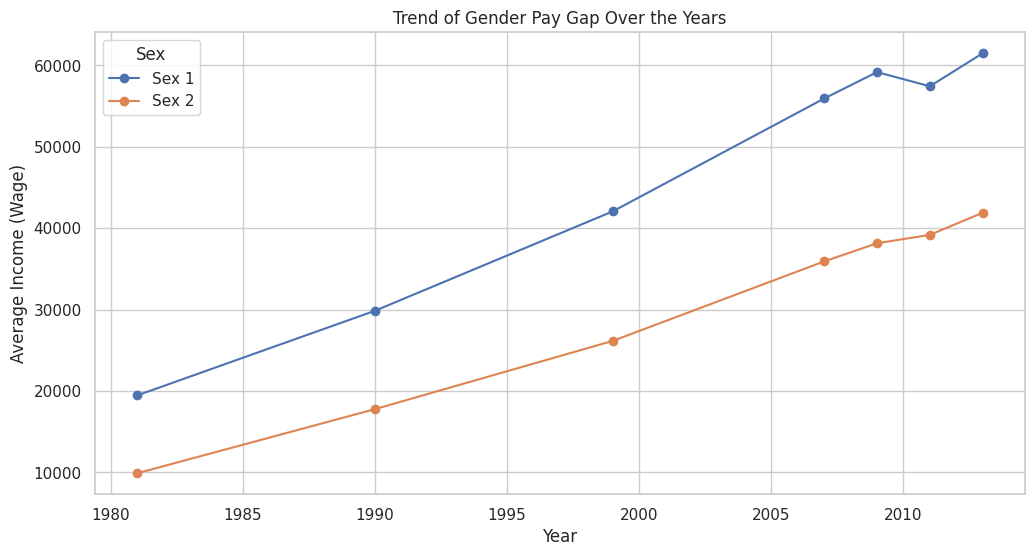

In [14]:
sns.set(style="whitegrid")

trend_data = df.groupby(['year', 'sex'])['incwage'].mean().unstack()

plt.figure(figsize=(12, 6))
for sex in trend_data.columns:
    plt.plot(trend_data.index, trend_data[sex], marker='o', label=f'Sex {sex}')

plt.title('Trend of Gender Pay Gap Over the Years')
plt.xlabel('Year')
plt.ylabel('Average Income (Wage)')
plt.legend(title='Sex')
plt.show()

<ipython-input-15-f7dfb83be583>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  educ_sex_income = df.groupby(['educ99', 'sex'], as_index=False)['incwage'].mean()


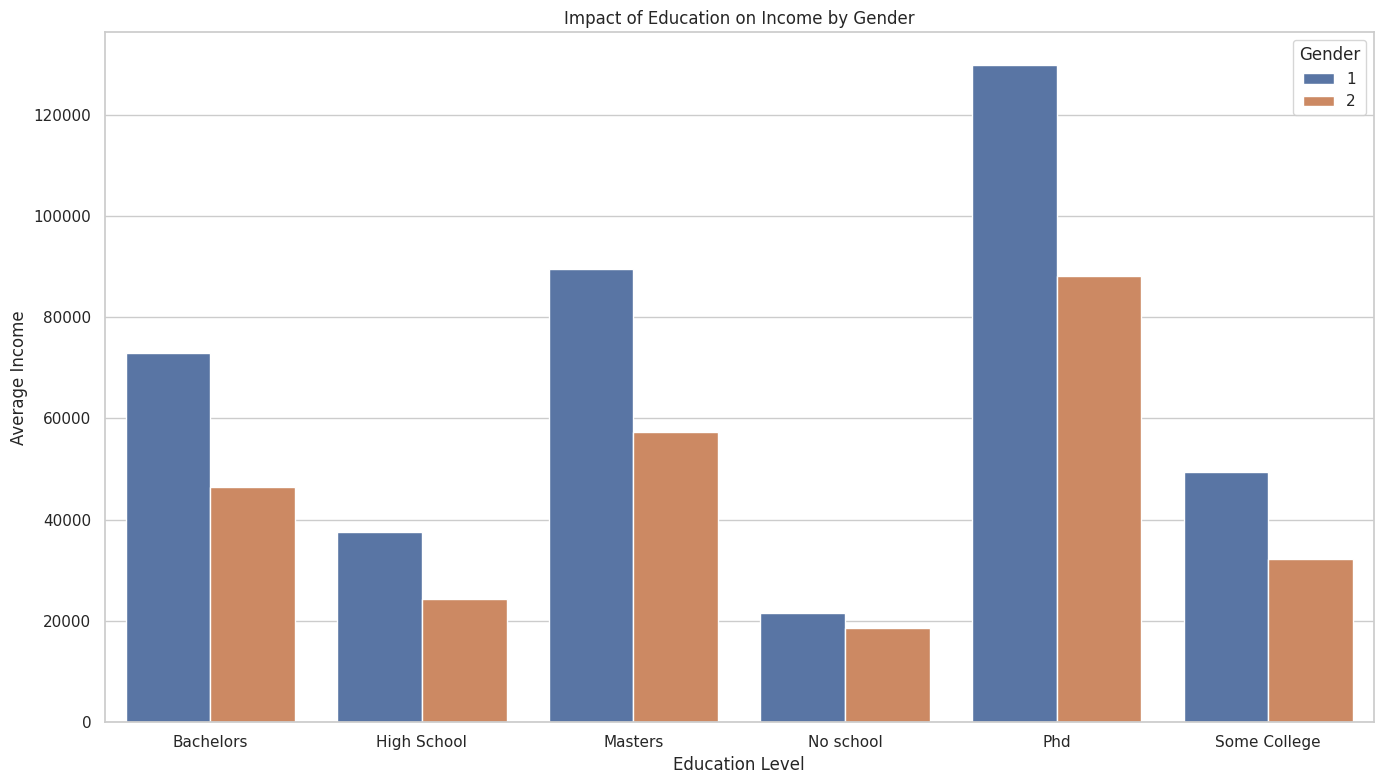

In [15]:
# Group by 'educ99' and 'sex', then calculate the average 'incwage'
educ_sex_income = df.groupby(['educ99', 'sex'], as_index=False)['incwage'].mean()

# Use seaborn to create a bar plot
plt.figure(figsize=(14, 8))
sns.barplot(data=educ_sex_income, x='educ99', y='incwage', hue='sex')

# Adding titles and labels
plt.title('Impact of Education on Income by Gender')
plt.xlabel('Education Level')
plt.ylabel('Average Income')
plt.legend(title='Gender')
plt.tight_layout()

# Show the plot
plt.show()

<ipython-input-16-910f5bfa5142>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  weeks_income = df.groupby(['wkswork1', 'sex']).agg({'incwage': 'median'}).unstack()


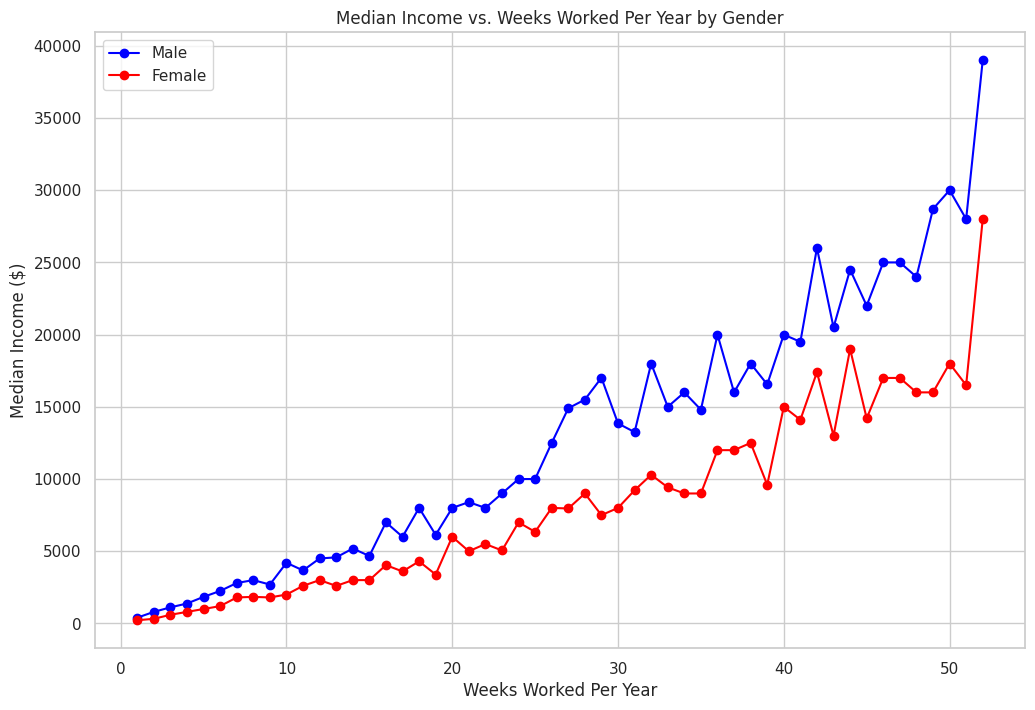

In [16]:
weeks_income = df.groupby(['wkswork1', 'sex']).agg({'incwage': 'median'}).unstack()

# Reset index to make 'wkswork1' a column and flatten columns for plotting
weeks_income.columns = ['Male', 'Female']
weeks_income.reset_index(inplace=True)

# Create a scatter plot to visualize the data
plt.figure(figsize=(12, 8))
plt.plot(weeks_income['wkswork1'], weeks_income['Male'], label='Male', marker='o', linestyle='-', color='blue')
plt.plot(weeks_income['wkswork1'], weeks_income['Female'], label='Female', marker='o', linestyle='-', color='red')
plt.title('Median Income vs. Weeks Worked Per Year by Gender')
plt.xlabel('Weeks Worked Per Year')
plt.ylabel('Median Income ($)')
plt.legend()
plt.grid(True)
plt.show()

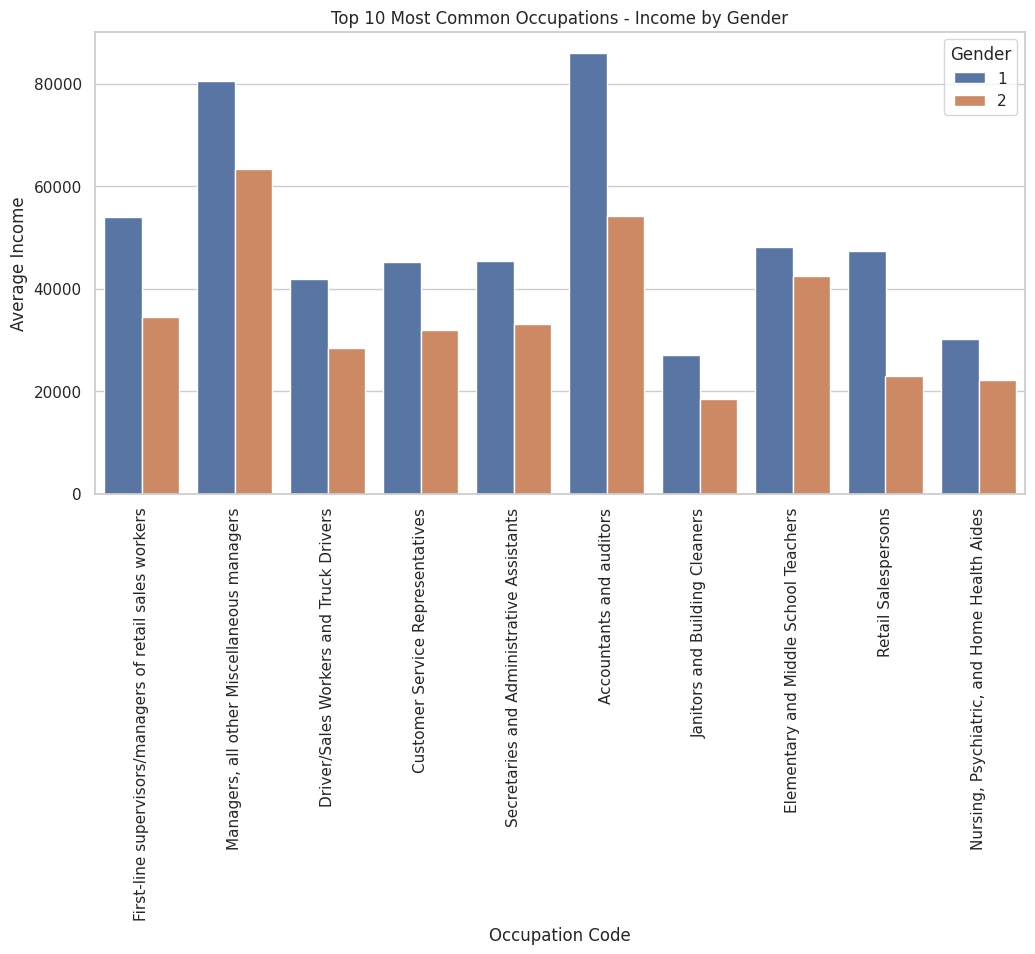

In [17]:
top_occupations = df['occ'].value_counts().nlargest(10).index

# Filter the dataset to include only the top 10 occupations
top_occ_data = df[df['occ'].isin(top_occupations)]

occ_map = {
    430 : 'Managers, all other Miscellaneous managers',
    800: 'Accountants and auditors',
    2310: 'Elementary and Middle School Teachers',
    3600: 'Nursing, Psychiatric, and Home Health Aides',
    4220: 'Janitors and Building Cleaners',
    4700: 'First-line supervisors/managers of retail sales workers',
    4760: 'Retail Salespersons',
    5240: 'Customer Service Representatives',
    5700: 'Secretaries and Administrative Assistants',
    9130: 'Driver/Sales Workers and Truck Drivers'
}

top_occ_data['occ'] = top_occ_data['occ'].map(occ_map)

# Create a bar plot for the top 10 occupations
plt.figure(figsize=(12, 6))
sns.barplot(x='occ', y='incwage', hue='sex', data=top_occ_data, errorbar=None)
plt.title('Top 10 Most Common Occupations - Income by Gender')
plt.xlabel('Occupation Code')
plt.ylabel('Average Income')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.show()

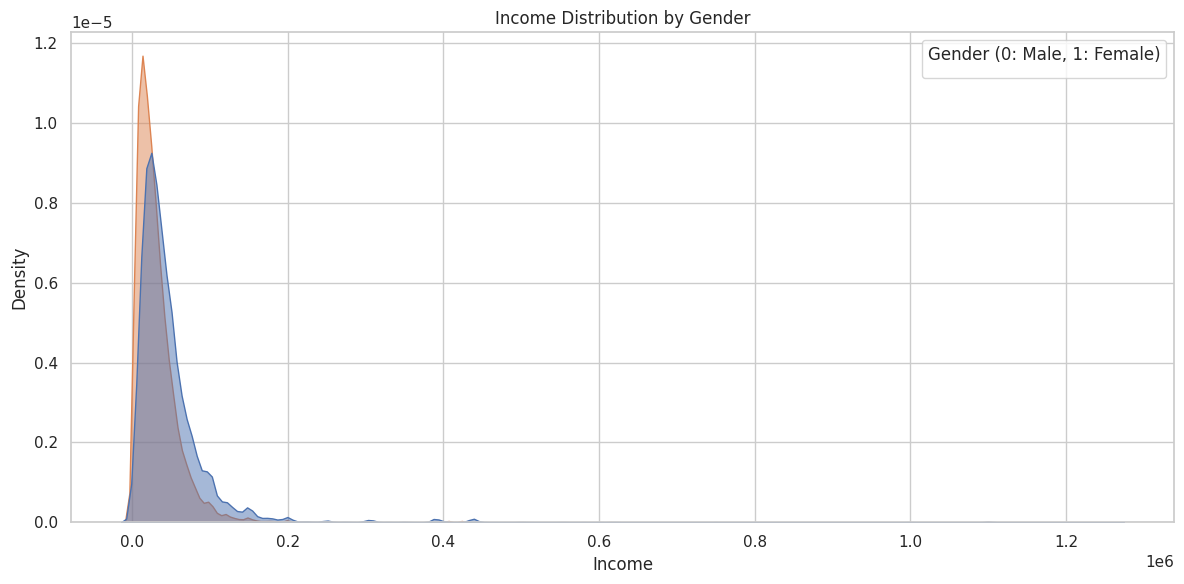

In [18]:
plt.figure(figsize=(12, 6))
sns.kdeplot(data=df, x='incwage', hue='sex', fill=True, alpha=0.5)
plt.title('Income Distribution by Gender')
plt.xlabel('Income')
plt.ylabel('Density')
plt.legend(title='Gender (0: Male, 1: Female)')
plt.tight_layout()
plt.show()

In [19]:
df['occ'] = df['occ'].astype('category')

### Training Model

In [20]:
top_occ_data['occ'].value_counts()

,count
occ,
Elementary and Middle School Teachers,6010
Secretaries and Administrative Assistants,5602
Driver/Sales Workers and Truck Drivers,5161
"Managers, all other Miscellaneous managers",5009
First-line supervisors/managers of retail sales workers,4484
Janitors and Building Cleaners,3568
Retail Salespersons,3455
"Nursing, Psychiatric, and Home Health Aides",3238
Accountants and auditors,3039


In [21]:
target_variable = "sex"
demographic = ["race", "incwage"]
sensitive = ["race"]

In [22]:
df['sex'] = df['sex'].astype(int) - 1
df_2011 = df[df['year']== 2011]
Y = df_2011['sex']

In [23]:
X = pd.get_dummies(df_2011.drop(['race','sex'], axis=1))

In [24]:
#splitting Data into training and testing set
X_train, X_test, Y_train, Y_test, df_train, df_test = train_test_split(
    X,
    Y,
    df_2011,
    test_size=0.30,
    random_state=72
)

### Training a Linear Regression Model

In [25]:
# Creating a pipeline with StandardScaler and LogisticRegression
lr_pipeline = Pipeline(steps=[
    ("preprocessing", StandardScaler()),
    ("logistic_regression", LogisticRegression())
])

In [26]:
#fitting training data to pipeline
lr_pipeline.fit(X_train, Y_train)

Pipeline(steps=[('preprocessing', StandardScaler()),
                ('logistic_regression', LogisticRegression())])

In [27]:
# using the fitted modelt o predict results for Y_test
Y_pred_proba = lr_pipeline.predict_proba(X_test)[:,1]
Y_pred = lr_pipeline.predict(X_test)

#### Decison Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
tree_pipeline = Pipeline(steps=[
    ("preprocessing", StandardScaler()),
    ("Decision Tree", DecisionTreeClassifier())
])
tree_pipeline.fit(X_train, Y_train)
Y_pred_proba_tree = tree_pipeline.predict_proba(X_test)[:,1]
Y_pred_tree = tree_pipeline.predict(X_test)

#### Random Forest

In [29]:
from sklearn.ensemble import RandomForestClassifier
random_pipeline = Pipeline(steps=[
    ("preprocessing", StandardScaler()),
    ("Random Forest", RandomForestClassifier())
])
random_pipeline.fit(X_train, Y_train)
Y_pred_proba_random = random_pipeline.predict_proba(X_test)[:,1]
Y_pred_random = random_pipeline.predict(X_test)

### Evaluating the Model

In [30]:
from sklearn.metrics import accuracy_score, precision_score, recall_score
print("Logistic Regression")
print("Accuracy: ",accuracy_score(Y_test, Y_pred))
print("Precision: ",precision_score(Y_test, Y_pred))
print("Recall: ",recall_score(Y_test, Y_pred))

Logistic Regression
Accuracy:  0.7829558113627925
Precision:  0.7748559077809798
Recall:  0.7981447124304267


In [31]:
print("Decison Tree")
print("Accuracy: ",accuracy_score(Y_test, Y_pred_tree))
print("Precision: ",precision_score(Y_test, Y_pred_tree))
print("Recall: ",recall_score(Y_test, Y_pred_tree))

Decison Tree
Accuracy:  0.7020051986632009
Precision:  0.7028535980148883
Recall:  0.7006802721088435


In [32]:
print("Random Forest")
print("Accuracy: ",accuracy_score(Y_test, Y_pred_random))
print("Precision: ",precision_score(Y_test, Y_pred_random))
print("Recall: ",recall_score(Y_test, Y_pred_random))

Random Forest
Accuracy:  0.7703304864463424
Precision:  0.7698667324777887
Recall:  0.7716759431045145


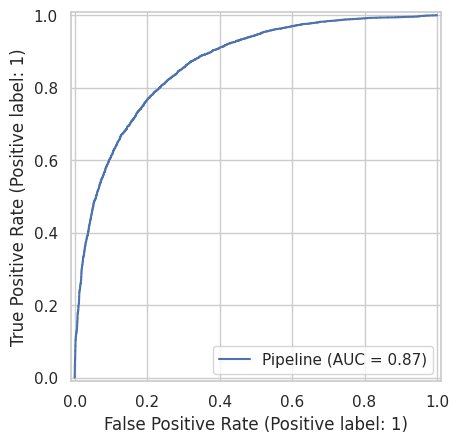

In [34]:
RocCurveDisplay.from_estimator(lr_pipeline, X_test, Y_test);

In [35]:
balanced_accuracy_score(Y_test, Y_pred)

0.7829445226960755

In [36]:
lr_pipeline.predict([X_test.iloc[78].values])[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


0

### Model Interpretability

In [37]:
# LIME & SHAP
explainer_lime_lr = LimeTabularExplainer(X_train.values,
                                      feature_names=X_train.columns,
                                      class_names=["Male","Female"],
                                      discretize_continuous=True)


lime_exp_lr = explainer_lime_lr.explain_instance(X_test.iloc[78].values, lr_pipeline.predict_proba, num_features=20)

lime_exp_lr.show_in_notebook()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


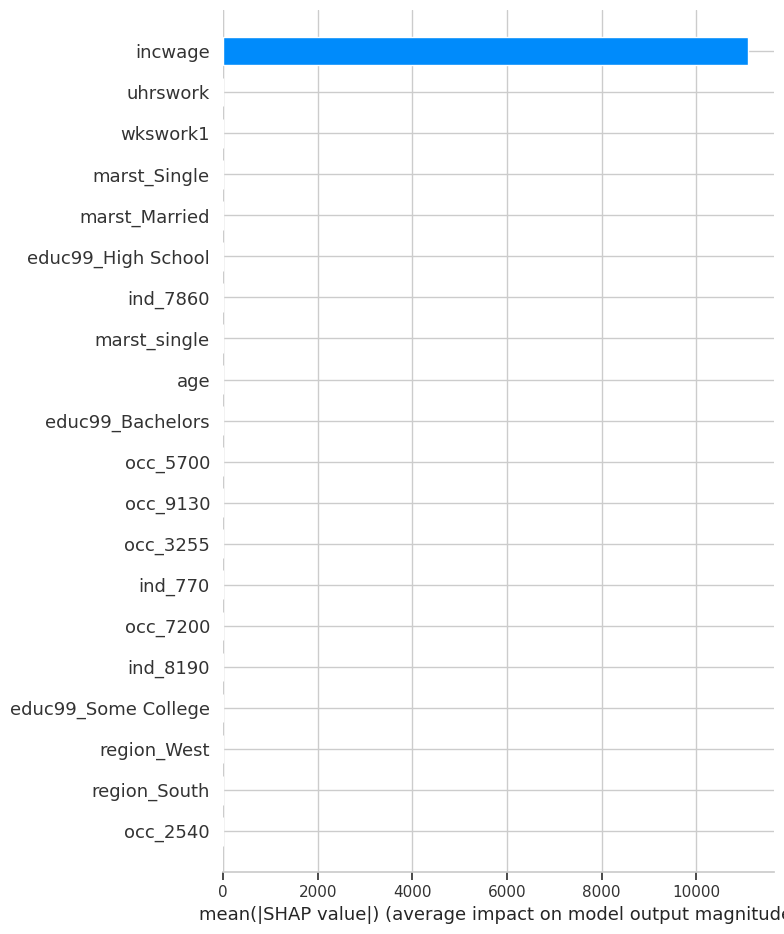

In [39]:
logistic_model = lr_pipeline.named_steps["logistic_regression"]
explainer_shap_lr = shap.LinearExplainer(logistic_model, X_train)
shap_values_lr = explainer_shap_lr.shap_values(X_test)
shap.summary_plot(shap_values_lr, X_test, plot_type="bar")

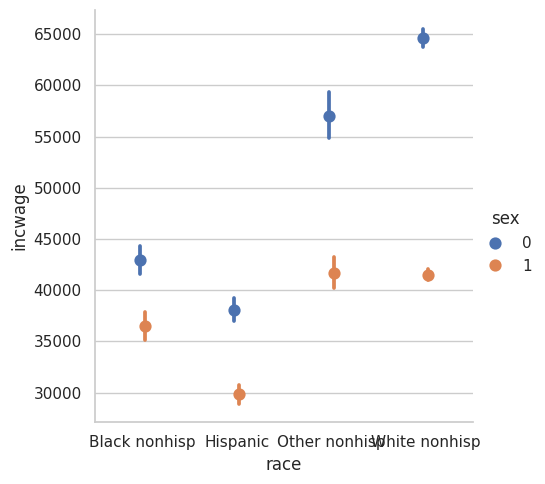

In [40]:
sns.catplot(y="incwage", x="race", hue="sex", data=df_2011,
            kind="point", dodge=True, errorbar=('ci', 95), linestyle='none');

In [41]:
# Fairness Metrics
metrics_dict = {
    "selection_rate": selection_rate,
    "false_negative_rate": false_negative_rate,
    "balanced_accuracy": balanced_accuracy_score,
}

metricframe_unmitigated = MetricFrame(metrics=metrics_dict,
                  y_true=Y_test,
                  y_pred=Y_pred,
                  sensitive_features=df_test['race'])

# The disaggregated metrics are then stored in a pandas DataFrame:

metricframe_unmitigated.by_group

,selection_rate,false_negative_rate,balanced_accuracy
race,,,
Black nonhisp,0.613874,0.169364,0.751501
Hispanic,0.467359,0.229068,0.786165
Other nonhisp,0.495604,0.265802,0.735395
White nonhisp,0.514837,0.193555,0.790730


In [42]:
len(df_2011['race'])

53857

In [44]:
# Checking for Drift using Evidently
report = Report(metrics=[
    DataDriftPreset(),
])

report.run(reference_data=df_2011, current_data=df[df['year']==2007])
report

Output hidden; open in https://colab.research.google.com to view.